<a href="https://colab.research.google.com/github/Priyo-prog/Generative-AI-Lessons/blob/main/DCGANs/DCGAN_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DCGAN - Deep Convolutional GANs**

## Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

## Loading And Preprocessing The Dataset

In [3]:
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Images for training
X_train.shape

(60000, 28, 28)

In [5]:
# Classes for training
y_train.shape

(60000,)

In [6]:
# View the class of a random image
i = np.random.randint(0, 60000)
print(i)
print(y_train[i])

33001
5


9168
3


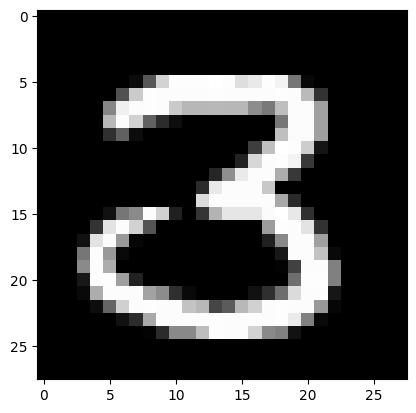

In [7]:
# View the image and the class
i = np.random.randint(0, 60000)
print(i)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray')

In [8]:
# Preprocessing the data to be compatiable with tensorflow
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

## Reshape the data to float type

Currently we see the tensor is integer type. To make it compatiable with tensorflow we need to reshape it float type

In [9]:
X_train = tf.cast(X_train, dtype=tf.float32)

In [10]:
# Now see the tensor once again
X_train[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.

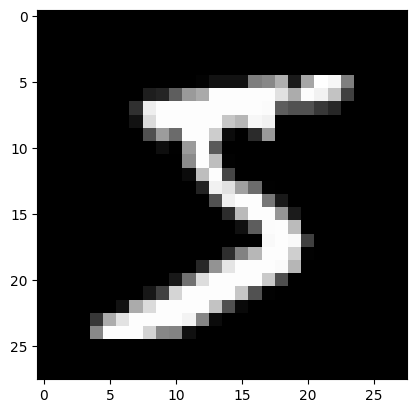

In [11]:
plt.imshow(X_train[0], cmap='gray')

In [12]:
X_train.shape

TensorShape([60000, 28, 28])

## Reshape to add the color channels

In [13]:
X_train = tf.reshape(X_train, shape=(60000, 28, 28, 1))

In [14]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [15]:
X_train[:1, :1, :1, :1]

<tf.Tensor: shape=(1, 1, 1, 1), dtype=float32, numpy=array([[[[0.]]]], dtype=float32)>

In [16]:
# X_train[0].min(), X_train[0].max() # This won't work, it works on numpy not on tensors
tf.reduce_min(X_train), tf.reduce_max(X_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=255.0>)

## Normalizing the tensor data

In [17]:
X_train = (X_train - 127.5) / 127.5

In [18]:
tf.reduce_min(X_train), tf.reduce_max(X_train)

(<tf.Tensor: shape=(), dtype=float32, numpy=-1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

## Determine Batch Size

Now we are going to feed the discriminator with batch size of 256.


In [19]:
buffer_size = 60000
batch_size = 256

In [20]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [21]:
X_train = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

In [22]:
type(X_train)

tensorflow.python.data.ops.batch_op._BatchDataset

## Build the Generator

Important to remember:

* Whilde adding layers to the neural network we will use `use_bias` as `False`since we are not training the generator with images for classification we are going to receive noise generate random images.

* LeakyReLU - In case of ReLU (rectified linear unit) the number returns itself if it is greater than 0 or 0 if it is less than 0, but Leaky Relu won't return 0 in case of value less than 0. It will return a value depending upon `alpha` parameter

In [23]:
def build_generator():
  network = tf.keras.Sequential()
  network.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  network.add(layers.BatchNormalization()) # Normalization
  network.add(layers.LeakyReLU()) # Activation Function

  network.add(layers.Reshape((7, 7, 256)))

  # 7x7x128
  network.add(layers.Conv2DTranspose(filters=128, kernel_size=(5, 5), strides=(1, 1), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  # 7x7x64
  network.add(layers.Conv2DTranspose(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same', use_bias=False))
  network.add(layers.BatchNormalization())
  network.add(layers.LeakyReLU())
  # 28x28x1
  network.add(layers.Conv2DTranspose(filters=1, kernel_size=(5, 5),
                                     strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
  network.summary()

  return network

In [24]:
generator = build_generator()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1254400   
                                                                 
 batch_normalization (Batch  (None, 12544)             50176     
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 12544)             0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 7, 7, 128)         819200    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 128)         5

In your code, the tf.keras.layers.Conv2DTranspose layers do not explicitly understand the image size (28x28) or color channel (1) at the last layer. They infer this information based on the sequential nature of your model and how the shapes are transformed throughout the network. Here's a breakdown of how it works:

Initial Shape:

The first layer, layers.Dense(7*7*256), defines an input with a shape of (100,). This 100 represents a 1-dimensional vector of size 100.
Reshaping:

The layers.Reshape((7, 7, 256)) layer explicitly transforms the 1D vector into a 3D tensor with the shape (7, 7, 256). While this shape might seem arbitrary at this point, it sets the stage for the following convolutional transpose layers.
Conv2DTranspose Layers:

Each Conv2DTranspose layer takes the output shape of the previous layer as input and performs the transpose convolution operation.
The kernel size, strides, and padding parameters in these layers manipulate the height, width, and number of channels of the feature maps.
Here's how the shapes change through the Conv2DTranspose layers:
First Conv2DTranspose: Input (7, 7, 256), filters=128, kernel=5x5, strides=1, padding='same' - This operation typically doesn't change the spatial dimensions (7x7). The number of channels becomes 128 ((7, 7, 128)) due to the filters used.
Second Conv2DTranspose: Input (7, 7, 128), filters=64, kernel=5x5, strides=2, padding='same' - The strides of 2 in both height and width effectively double the spatial dimensions (14, 14, 64).
Last Conv2DTranspose: Input (14, 14, 64), filters=1, kernel=5x5, strides=2, padding='same', activation='tanh' - Similar to the second layer, the strides of 2 lead to a final output shape of (28, 28, 1). The filter of 1 ensures a single channel (grayscale image).

## Create Noise and pass it to the generator

In [25]:
noise = tf.random.normal(shape=(1, 100))
noise

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 0.6478994 , -0.2365727 ,  0.6180027 , -1.0276002 , -0.45735073,
         0.41838887, -0.1389916 ,  0.36175686, -0.31084794,  0.77333707,
         0.39525127, -0.7859492 ,  0.37034017, -3.3380969 , -0.3831432 ,
        -1.5257093 ,  1.126094  , -0.16556211,  0.6925919 , -0.28888255,
         0.5518845 ,  0.8887686 ,  0.6313547 ,  1.1065497 ,  2.7723463 ,
        -0.31789687, -0.47829804, -0.34340614, -1.154508  ,  0.14929605,
        -0.6958817 ,  0.79624224, -0.8996238 , -1.981211  , -1.6256206 ,
        -0.37777743, -1.2980292 ,  1.4539719 ,  0.9656436 , -0.29995367,
        -1.5178304 ,  0.79736525,  0.57119656,  0.04856191,  1.5225852 ,
         0.4361265 , -1.5322391 ,  0.16015236, -0.5336249 , -0.7437835 ,
        -1.0625046 ,  0.4605584 , -0.81823355, -0.5929934 , -1.0434846 ,
        -0.46668828,  0.57096815, -0.3933209 , -0.00983547, -0.46943834,
         1.5302348 ,  0.15759818, -0.9451261 , -0.730251  , -0.7924985 ,
 

In [26]:
# pass the noise to the generator
generated_image = generator(noise, training=False)

In [27]:
generated_image.shape

TensorShape([1, 28, 28, 1])

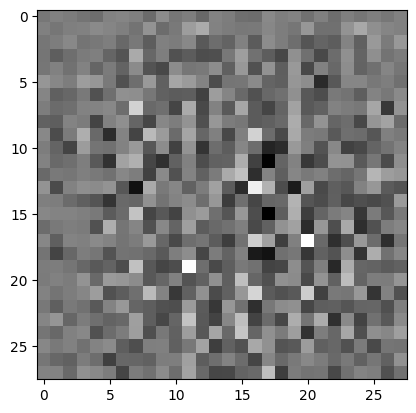

In [28]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

## Build the Discriminator

In [29]:
def build_discriminator():
  network = tf.keras.Sequential()
  # 14x14x64
  network.add(layers.Conv2D(filters=64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 7x7x128
  network.add(layers.Conv2D(filters=128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
  network.add(layers.LeakyReLU())
  network.add(layers.Dropout(0.3))

  # 4x4x256
  network.add(layers.Flatten())
  network.add(layers.Dense(1))

  network.summary()

  return network

In [30]:
discriminator = build_discriminator()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 7, 7, 128)         0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)             

## Loss Error Calculation

In [31]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [32]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

In [33]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [34]:
generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

## Training the GAN and visualizing the result

In [35]:
epochs = 100
noise_dimension = 100
number_of_images = 16

In [36]:
batch_size, noise_dimension

(256, 100)

In [37]:
@tf.function
def train(images):
  noise = tf.random.normal([batch_size, noise_dimension])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)
    expected_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(expected_output, fake_output)

  generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc.loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

### Create test images

In [38]:
test_images = tf.random.normal([number_of_images, noise_dimension])
test_images.shape

TensorShape([16, 100])

In [39]:
def train_gan(dataset, epochs, test_images):
  for epoch in range(epochs):
    for image_batch in dataset:
      train(image_batch)
      print("Epoch", epoch + 1)
      generated_images = generator(test_images, training=False)
      fig = plt.figure(figsize=(10,10))
      for i in range(generated_images.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
      plt.show()